In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## part I

In [2]:
df_crsp = pd.read_csv(r"D:\1YFT_Math_and_Finance\Autumn\Portfolio Management\wtiyx1gpw5qo2mba.csv.gz", na_values=['C'], parse_dates=['date'])

# The output from WRDS returns a mixed of small and large cap column names.
# We can easily convert everything to small caps.
cols = df_crsp.columns
df_crsp.columns = [c.lower() for c in cols]
df_crsp.drop_duplicates(keep='first',inplace=True)
df_crsp.reset_index(inplace=True,drop=True)
df_crsp = df_crsp[df_crsp['exchcd'] == 1.0]
df_crsp['ret'] = pd.to_numeric(df_crsp['ret'], errors='coerce')

df_crsp

,permno,date,exchcd,permco,prc,vol,ret,shrout,vwretd,ewretd
916,10006,1925-12-31,1.0,22156,109.00000,NaN,NaN,600.0,NaN,NaN
917,10006,1926-01-30,1.0,22156,110.25000,753.0,0.032732,600.0,0.000561,0.023174
918,10006,1926-02-27,1.0,22156,102.37500,342.0,-0.071429,600.0,-0.033046,-0.053510
919,10006,1926-03-31,1.0,22156,96.50000,489.0,-0.042735,600.0,-0.064002,-0.096824
920,10006,1926-04-30,1.0,22156,94.00000,249.0,-0.025907,600.0,0.037029,0.032975
...,...,...,...,...,...,...,...,...,...,...
5041302,93427,2023-08-31,1.0,53445,160.77000,100449.0,0.300307,36191.0,-0.020605,-0.052542
5041303,93427,2023-09-29,1.0,53445,166.62000,64970.0,0.036387,36191.0,-0.047390,-0.055443
5041304,93427,2023-10-31,1.0,53445,155.00000,77214.0,-0.069739,36331.0,-0.028867,-0.060887
5041305,93427,2023-11-30,1.0,53445,161.89999,68822.0,0.044516,36331.0,0.092057,0.080251


In [3]:
data_1926 = df_crsp[df_crsp['date'].dt.year == 1926]  
# drop duplicate
unique_companies = data_1926['permno'].nunique()
unique_companies

565

In [4]:
df_crsp['prc'] = abs(df_crsp['prc'])#abs
df_crsp

,permno,date,exchcd,permco,prc,vol,ret,shrout,vwretd,ewretd
916,10006,1925-12-31,1.0,22156,109.00000,NaN,NaN,600.0,NaN,NaN
917,10006,1926-01-30,1.0,22156,110.25000,753.0,0.032732,600.0,0.000561,0.023174
918,10006,1926-02-27,1.0,22156,102.37500,342.0,-0.071429,600.0,-0.033046,-0.053510
919,10006,1926-03-31,1.0,22156,96.50000,489.0,-0.042735,600.0,-0.064002,-0.096824
920,10006,1926-04-30,1.0,22156,94.00000,249.0,-0.025907,600.0,0.037029,0.032975
...,...,...,...,...,...,...,...,...,...,...
5041302,93427,2023-08-31,1.0,53445,160.77000,100449.0,0.300307,36191.0,-0.020605,-0.052542
5041303,93427,2023-09-29,1.0,53445,166.62000,64970.0,0.036387,36191.0,-0.047390,-0.055443
5041304,93427,2023-10-31,1.0,53445,155.00000,77214.0,-0.069739,36331.0,-0.028867,-0.060887
5041305,93427,2023-11-30,1.0,53445,161.89999,68822.0,0.044516,36331.0,0.092057,0.080251


In [5]:
from collections import defaultdict

df_crsp['date'] = pd.to_datetime(df_crsp['date'])

start_year = 1926
end_year = 2023
start_month = 1

date = []
valid_firm_number = []
total_number = []
filter_all_data = defaultdict(list)

for year in range(start_year, end_year + 1):
    sum_valid = 0  
    total_tests = 0  
    
    start_date = pd.Timestamp(year=year, month=start_month, day=1)
    end_date = start_date + pd.DateOffset(months=85) 

    date.append(start_date.date())

    need_data = df_crsp.copy(deep=True)
    need_data.dropna(inplace=True)
    filtered_data = need_data[(need_data['date'] >= start_date)]
    grouped_data = filtered_data.groupby('permno').filter(
        lambda x: (x['date'].iloc[0].year == start_date.year) and (x['date'].iloc[0].month == start_date.month)
    )
    grouped_data = grouped_data.groupby('permno') 

    for idx, group in grouped_data:
        total_tests += 1 

        first_85 = group.head(85).copy()
        first_85['year'] = first_85['date'].dt.year
        first_85['month'] = first_85['date'].dt.month
        first_85['month_number'] = (first_85['year'] - first_85['year'].iloc[0]) * 12 + first_85['month']

        first_85['month_diff'] = first_85['month_number'].diff().fillna(1)
        first_85['is_consecutive'] = first_85['month_diff'] == 1

        if first_85['is_consecutive'].all():
            sum_valid += 1
            filter_all_data[start_date.date()].append(idx)

    valid_firm_number.append(sum_valid)
    total_number.append(total_tests)

for i in range(len(date)):
    print(
        f"start date:{date[i]}, Proportion of eligible companies: {valid_firm_number[i] / total_number[i]:.2%}, "
        f"Proportion of eligible companies: {valid_firm_number[i]}, Total number of active firms: {total_number[i]}"
    )
del need_data

start date:1926-01-01, Proportion of eligible companies: 70.91%, Proportion of eligible companies: 351, Total number of active firms: 495
start date:1927-01-01, Proportion of eligible companies: 73.47%, Proportion of eligible companies: 396, Total number of active firms: 539
start date:1928-01-01, Proportion of eligible companies: 73.25%, Proportion of eligible companies: 430, Total number of active firms: 587
start date:1929-01-01, Proportion of eligible companies: 72.57%, Proportion of eligible companies: 455, Total number of active firms: 627
start date:1930-01-01, Proportion of eligible companies: 76.07%, Proportion of eligible companies: 550, Total number of active firms: 723
start date:1931-01-01, Proportion of eligible companies: 79.75%, Proportion of eligible companies: 583, Total number of active firms: 731
start date:1932-01-01, Proportion of eligible companies: 83.79%, Proportion of eligible companies: 610, Total number of active firms: 728
start date:1933-01-01, Proportion 

In [6]:
def filter_consecutive_data(date, consecutive_months=84):
    start_date = date - pd.DateOffset(months=consecutive_months)
    return filter_all_data[pd.to_datetime(start_date).date()]

In [7]:
df_crsp['lret'] = np.log(1 + df_crsp['ret'])
df_crsp['lvwretd'] = np.log(1 + df_crsp['vwretd'])
df_crsp['lewretd'] = np.log(1 + df_crsp['ewretd'])
# Compute the market cap
df_crsp['size'] = df_crsp['shrout'] * df_crsp['prc']

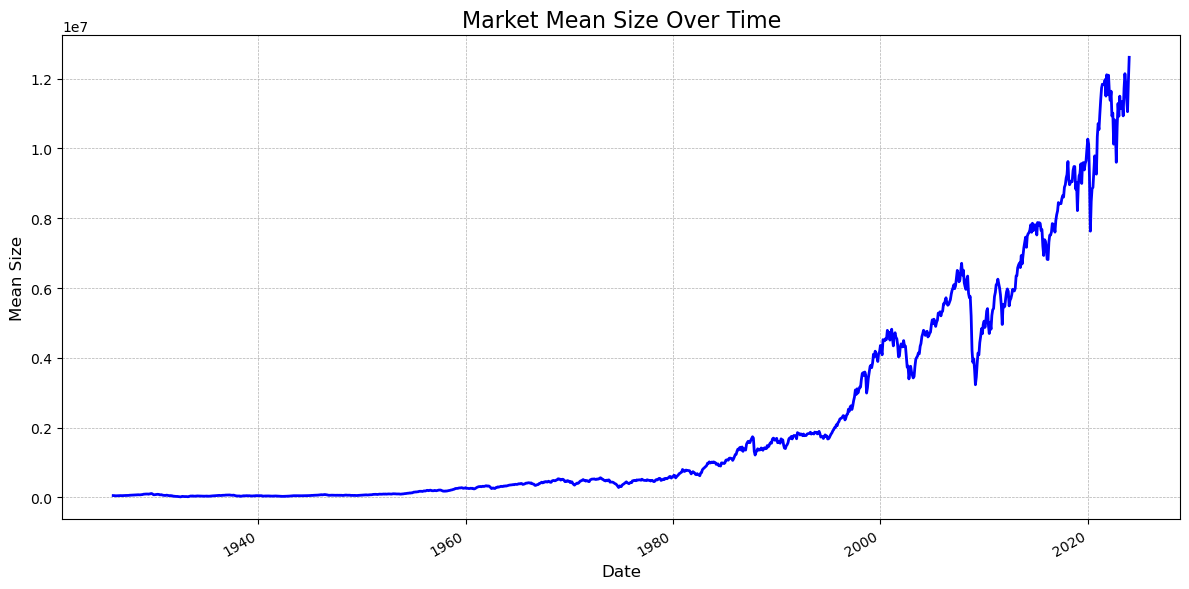

In [8]:
# Calculate and plot the mean size
plt.subplots(figsize=(12, 6))

df_crsp.groupby(['date'])['size'].mean().plot(color='blue', linewidth=2)
# Enhance the plot with grid, intercept, title, and labels
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.title('Market Mean Size Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Size', fontsize=12)

# Show plot with enhancements
plt.tight_layout()
plt.show()

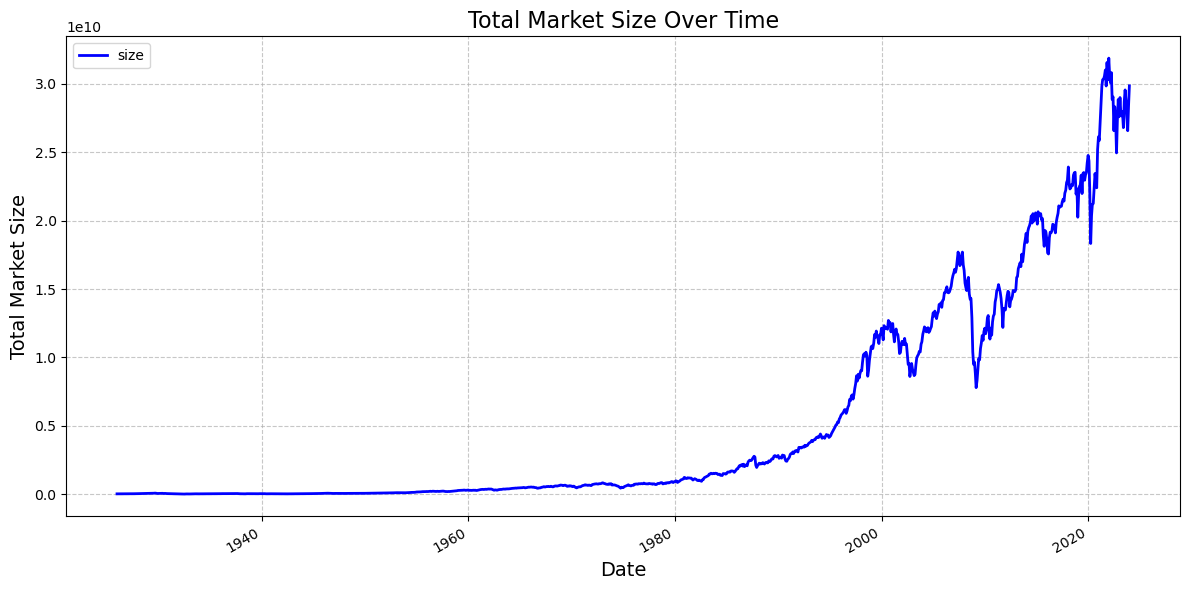

In [9]:
# Plotting total market size over time
fig, ax = plt.subplots(figsize=(12, 6))
df_crsp.groupby(['date'])['size'].sum().plot(color='blue', linewidth=2)

# Enhancing the plot
ax.set_title('Total Market Size Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Total Market Size', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()


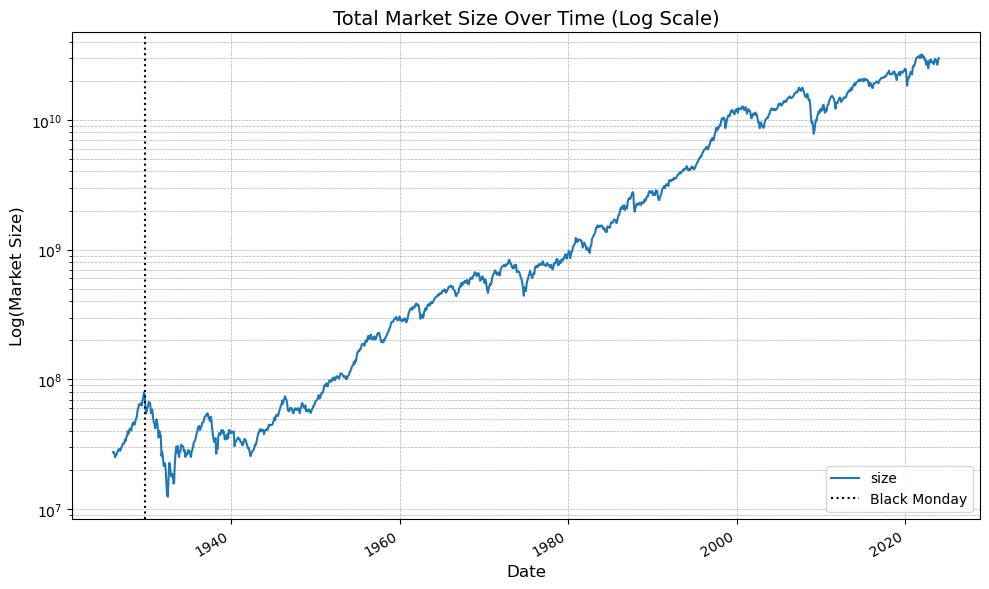

In [10]:

# Plot total market size over time in log scale
fig, ax = plt.subplots(figsize=(10, 6))
df_crsp.groupby(['date'])['size'].sum().plot(logy=True, ax=ax)

# Adding a vertical line for Black Monday
ax.axvline(x=datetime(1929, 10, 24), color='k', linestyle=':', label='Black Monday')

# Enhancing the plot
ax.set_title("Total Market Size Over Time (Log Scale)", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Log(Market Size)", fontsize=12)
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
ax.legend()

plt.tight_layout()
plt.show()


## Part II

In [11]:
df_crsp = df_crsp.set_index('date')
df_crsp = df_crsp.sort_index()

In [12]:
def compute_performance_portfolios(hold_date, data, formation_period=36, use_deciles=True, n_stocks=35, benchmark='ewretd'):
    
    if hold_date == pd.to_datetime('1932-1-1'):
        valid_list = filter_consecutive_data(hold_date, consecutive_months=72)
    else:
        valid_list = filter_consecutive_data(hold_date, consecutive_months=84)
    # Define the beginning date of the formation period
    start_date = hold_date - pd.DateOffset(months=formation_period)
    
    # Filter data for the formation period
    formation_data = data[
        (data.index >= start_date) & (data.index <= hold_date.to_pydatetime()) & (data['permno'].isin(valid_list))
        ].copy()
    # Group by stock_id and compute total log returns over the formation period
    stock_returns = formation_data.groupby('permno')[['lret', 'lvwretd', 'lewretd']].sum()
    # Compute excess returns based on the chosen benchmark
    stock_returns['lexret'] = stock_returns['lret'] - stock_returns['l' + benchmark]
    # Compute deciles and rankings for excess returns

    stock_returns['decile'] = pd.qcut(stock_returns['lexret'], 9, labels=False)  # (0 = worst, 9 = best)
    stock_returns['rank_asc'] = stock_returns['lexret'].rank()  # (1 = worst return)
    stock_returns['rank_desc'] = stock_returns['lexret'].rank(ascending=False)  # (1 = best return)

    numberofstock = 0
    # Select top and bottom portfolios
    if use_deciles:
        top_portfolio_test = stock_returns[stock_returns['decile'] == 8].reset_index()
        top_portfolio = stock_returns[stock_returns['decile'] == 8].reset_index()[['permno', 'lexret']]
        numberofstock = stock_returns[stock_returns['decile'] == 8].shape[0]
        bottom_portfolio_test = stock_returns[stock_returns['decile'] == 0].reset_index()
        bottom_portfolio = stock_returns[stock_returns['decile'] == 0].reset_index()[['permno', 'lexret']]
        
    else:
        top_portfolio_test = stock_returns[stock_returns['rank_desc'] <= n_stocks].reset_index()
        top_portfolio = stock_returns[stock_returns['rank_desc'] <= n_stocks].reset_index()[['permno', 'lexret']]
        bottom_portfolio = stock_returns[stock_returns['rank_asc'] <= n_stocks].reset_index()[['permno', 'lexret']]
        bottom_portfolio_test = stock_returns[stock_returns['rank_asc'] <= n_stocks].reset_index()

    def calculate_weights(portfolio, price_data, date):
        weights = portfolio.copy()
        weights['ew'] = 1.0 / len(portfolio)
        weights['date'] = date
        market_cap = pd.merge_asof(weights, 
                                 price_data[['permno', 'size']],
                                 by='permno',
                                 left_on='date',
                                 right_index=True)
        
        market_cap['vw'] = market_cap['size'] / market_cap['size'].sum()
        return market_cap[['permno', 'ew', 'vw']]

    def calculate_AR_CAR(stock_data,benchmark,weight_type):
        #first calcultae AR
        stock_data[f'weighted_ret'] = stock_data[weight_type] * stock_data['ret']
        stock_data[f'weighted_benchmark'] = stock_data[weight_type] * stock_data[benchmark]
    
        portfolio_returns = stock_data.groupby('date')[[f'weighted_ret', f'weighted_benchmark']].sum()
        #print(portfolio_returns)
        
        portfolio_returns = portfolio_returns.reset_index()
        portfolio_returns['months'] = range(1, len(portfolio_returns) + 1)
        portfolio_returns['AR'] = (portfolio_returns[f'weighted_ret'] - 
                                            portfolio_returns[f'weighted_benchmark'])
        #then use AR to calculate CAR
        portfolio_returns['CAR'] = portfolio_returns['AR'].cumsum()

        return portfolio_returns[['months', 'AR','CAR']]

    # Merge portfolio with price data to compute weights
    top_formation_data = formation_data[formation_data['permno'].isin(top_portfolio_test['permno'])]
    top_weights = calculate_weights(top_portfolio_test, top_formation_data, hold_date)
    
    # Compute CAR for the top portfolio
    top_portfolio_returns = pd.merge(top_formation_data.reset_index(), top_weights, on='permno')
    car_results_top = calculate_AR_CAR(top_portfolio_returns, benchmark,benchmark[:2])
    
    # Extract CAR at the end of the formation period
    car_top = car_results_top['CAR'].iloc[-1]  # Get CAR at the last date

    bottom_formation_data = formation_data[formation_data['permno'].isin(bottom_portfolio_test['permno'])]
    bottom_weights = calculate_weights(bottom_portfolio_test, bottom_formation_data, hold_date)
    
    # Compute CAR for the bottom portfolio
    bottom_portfolio_returns = pd.merge(bottom_formation_data.reset_index(), bottom_weights, on='permno')
    car_results_bottom = calculate_AR_CAR(bottom_portfolio_returns, benchmark,benchmark[:2])
    
    # Extract CAR at the end of the formation period
    car_bottom = car_results_bottom['CAR'].iloc[-1]  # Get CAR at the last date
    return bottom_portfolio, top_portfolio, numberofstock, car_top,car_bottom

In [13]:
def calculate_portfolio_returns_modified(date, portfolio, price_data, benchmark_type, weight_type, holding_months):
    
    end_date = date + pd.offsets.MonthBegin(holding_months)
    period_data = price_data.loc[(price_data.index >= date) & (price_data.index <= end_date)].copy()


    stock_data = pd.merge(period_data.reset_index(), portfolio.copy(), on=['permno'])
    date_stock_pairs = [(d, p) for d in stock_data['date'].unique() 
                               for p in portfolio['permno'].unique()]
    complete_pairs = pd.DataFrame(date_stock_pairs, columns=['date', 'permno'])
    stock_data = pd.merge(stock_data, complete_pairs, how='outer', on=['permno', 'date'])
    
    def drop_rows_after_first_nan(data):
        def find_first_nan(group):
            nan_index = group['prc'].isna().idxmax() if group['prc'].isna().any() else None
            return nan_index

        grouped = data.groupby('permno')

        nan_indices = grouped.apply(find_first_nan)

        def remove_after_nan(group, nan_index):
            if nan_index is not None:
                group = group.loc[:nan_index - 1]
            return group

        def safe_remove_after_nan(group):
            if group.name in nan_indices:
                nan_index = nan_indices[group.name]
            else:
                nan_index = None
            return remove_after_nan(group, nan_index)

        cleaned_data = grouped.apply(safe_remove_after_nan)
        cleaned_data = cleaned_data.reset_index(drop=True)

        return cleaned_data

    new_stock_data = drop_rows_after_first_nan(stock_data)

    def calculate_weights(portfolio, price_data, date):
        weights = portfolio.copy()
        weights['ew'] = 1.0 / len(portfolio)
        weights['date'] = date

        market_cap = pd.merge_asof(weights, 
                                 price_data[['permno', 'size']],
                                 by='permno',
                                 left_on='date',
                                 right_index=True)
        
        market_cap['vw'] = market_cap['size'] / market_cap['size'].sum()
        market_cap['vw'] = market_cap['vw'].fillna(0)
        return market_cap[['permno', 'ew', 'vw']]
    
    weights = calculate_weights(portfolio, price_data, date)
    new_stock_data = pd.merge(new_stock_data, weights, on='permno')

    def calculate_AR_CAR(stock_data,benchmark):
        #first calcultae AR
        stock_data[f'weighted_ret'] = stock_data[weight_type] * stock_data['ret']
        stock_data[f'weighted_benchmark'] = stock_data[weight_type] * stock_data[benchmark]
    
        portfolio_returns = stock_data.groupby('date')[[f'weighted_ret', f'weighted_benchmark']].sum()
        #print(portfolio_returns)
        
        portfolio_returns = portfolio_returns.reset_index()
        portfolio_returns['months'] = range(1, len(portfolio_returns) + 1)
        portfolio_returns['AR'] = (portfolio_returns[f'weighted_ret'] - 
                                            portfolio_returns[f'weighted_benchmark'])
        #then use AR to calculate CAR
        portfolio_returns['CAR'] = portfolio_returns['AR'].cumsum()

        return portfolio_returns[['months', 'AR','CAR']]
        
    return calculate_AR_CAR(new_stock_data,benchmark_type)

def compute_portfolio_performance_modified(start_dates, portfolios, price_data, benchmark_type, weight_type,holding_months):
    bottom_returns = []
    top_returns = []
    
    for date in start_dates:
        bottom_returns.append(
                calculate_portfolio_returns_modified(
                date,
                portfolios[date][0],
                price_data,
                benchmark_type, 
                weight_type, 
                holding_months
            )
        )
    
        top_returns.append(
                calculate_portfolio_returns_modified(
                date,
                portfolios[date][1],
                price_data,
                benchmark_type, 
                weight_type, 
                holding_months
            )
        )
    
    bottom_returns = pd.concat(bottom_returns, ignore_index=True)
    top_returns = pd.concat(top_returns, ignore_index=True)
    
    # Add starting point (0,0) for CAR
    zero_point = pd.DataFrame({'months': [0], 'AR': [0], 'CAR': [0]})
    
    # Group by 'months' and calculate mean for AR and CAR directly
    bottom_mean = bottom_returns.groupby('months')[['AR', 'CAR']].mean().reset_index()
    top_mean = top_returns.groupby('months')[['AR', 'CAR']].mean().reset_index()
    
    # Combine with zero point for final output
    bottom_final = pd.concat([zero_point, bottom_mean], ignore_index=True)
    top_final = pd.concat([zero_point, top_mean], ignore_index=True)
    
    return bottom_final, top_final

------------

In [15]:
use_deciles = True
n_stocks = 35

In [16]:
form_period_3year = 36
hold_period_3year = 36
start_date_3year = '1933-01-01'
end_date_3year = '1978-01-01'
benchmark = 'ewretd'
period_start_dates_3year = pd.date_range(start=start_date_3year, end=end_date_3year, freq=str(int(form_period_3year)) + 'MS')
period_start_dates_3year

DatetimeIndex(['1933-01-01', '1936-01-01', '1939-01-01', '1942-01-01',
               '1945-01-01', '1948-01-01', '1951-01-01', '1954-01-01',
               '1957-01-01', '1960-01-01', '1963-01-01', '1966-01-01',
               '1969-01-01', '1972-01-01', '1975-01-01', '1978-01-01'],
              dtype='datetime64[ns]', freq='36MS')

In [17]:
form_period_5year = 60
hold_period_5year = 60
n_stocks_5year = 50
start_date_5year = '1933-01-01'
end_date_5year = '1978-01-01'
benchmark = 'ewretd'
period_start_dates_5year = pd.date_range(start=start_date_5year, end=end_date_5year, freq=str(int(form_period_5year)) + 'MS')
period_start_dates_5year

DatetimeIndex(['1933-01-01', '1938-01-01', '1943-01-01', '1948-01-01',
               '1953-01-01', '1958-01-01', '1963-01-01', '1968-01-01',
               '1973-01-01', '1978-01-01'],
              dtype='datetime64[ns]', freq='60MS')

In [18]:
form_period_2year = 24
hold_period_2year = 24
start_date_2year = '1933-01-01'
end_date_2year = '1979-01-01'
benchmark = 'ewretd'
period_start_dates_2year = pd.date_range(start=start_date_2year, end=end_date_2year, freq=str(int(form_period_2year)) + 'MS')
period_start_dates_2year

DatetimeIndex(['1933-01-01', '1935-01-01', '1937-01-01', '1939-01-01',
               '1941-01-01', '1943-01-01', '1945-01-01', '1947-01-01',
               '1949-01-01', '1951-01-01', '1953-01-01', '1955-01-01',
               '1957-01-01', '1959-01-01', '1961-01-01', '1963-01-01',
               '1965-01-01', '1967-01-01', '1969-01-01', '1971-01-01',
               '1973-01-01', '1975-01-01', '1977-01-01', '1979-01-01'],
              dtype='datetime64[ns]', freq='24MS')

In [19]:
start_date_2year_2 = '1932-01-01'
end_date_2year_2 = '1980-01-01'
benchmark = 'ewretd'
period_start_dates_2year_2 = pd.date_range(start=start_date_2year_2, end=end_date_2year_2, freq=str(int(form_period_2year)) + 'MS')
period_start_dates_2year_2

DatetimeIndex(['1932-01-01', '1934-01-01', '1936-01-01', '1938-01-01',
               '1940-01-01', '1942-01-01', '1944-01-01', '1946-01-01',
               '1948-01-01', '1950-01-01', '1952-01-01', '1954-01-01',
               '1956-01-01', '1958-01-01', '1960-01-01', '1962-01-01',
               '1964-01-01', '1966-01-01', '1968-01-01', '1970-01-01',
               '1972-01-01', '1974-01-01', '1976-01-01', '1978-01-01',
               '1980-01-01'],
              dtype='datetime64[ns]', freq='24MS')

In [20]:
form_period_1year = 12
hold_period_1year = 24
start_date_1year = '1933-01-01'
end_date_1year = '1981-01-01'
benchmark = 'ewretd'
period_start_dates_1year = pd.date_range(start=start_date_1year, end=end_date_1year, freq=str(int(form_period_1year)) + 'MS')
period_start_dates_1year

DatetimeIndex(['1933-01-01', '1934-01-01', '1935-01-01', '1936-01-01',
               '1937-01-01', '1938-01-01', '1939-01-01', '1940-01-01',
               '1941-01-01', '1942-01-01', '1943-01-01', '1944-01-01',
               '1945-01-01', '1946-01-01', '1947-01-01', '1948-01-01',
               '1949-01-01', '1950-01-01', '1951-01-01', '1952-01-01',
               '1953-01-01', '1954-01-01', '1955-01-01', '1956-01-01',
               '1957-01-01', '1958-01-01', '1959-01-01', '1960-01-01',
               '1961-01-01', '1962-01-01', '1963-01-01', '1964-01-01',
               '1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01'],
              dtype='datetime64[ns]', freq='12MS')

In [21]:
portfolios_thirtyfive_3year = {}
for date in period_start_dates_3year:
    portfolios_thirtyfive_3year[date] = compute_performance_portfolios(date, df_crsp, use_deciles=False, benchmark='vwretd')

In [22]:
portfolios_thirtyfive_3year = {}
portfolios_fifty_5year = {}
portfolios_thirtyfive_2year = {}
portfolios_thirtyfive_2year_2 = {}
portfolios_ten_decile_2year = {}
portfolios_ten_decile_2year_2 = {}
portfolios_thirtyfive_1year = {}
portfolios_thirtyfive_3year_w = {}
portfolios_fifty_5year_w = {}
portfolios_thirtyfive_2year_w = {}
portfolios_thirtyfive_2year_2_w = {}
portfolios_ten_decile_2year_w = {}
portfolios_ten_decile_2year_2_w = {}
portfolios_thirtyfive_1year_w = {}

car_top_3year, car_top_3year_w, car_bottom_3year, car_bottom_3year_w = 0,0,0,0
for date in period_start_dates_3year:
    portfolios_thirtyfive_3year[date] = compute_performance_portfolios(date, df_crsp, use_deciles=False, benchmark='ewretd')[:2]
    portfolios_thirtyfive_3year_car_top,portfolios_thirtyfive_3year_car_bottom = compute_performance_portfolios(date, df_crsp, use_deciles=False, benchmark='ewretd')[-2:]
    portfolios_thirtyfive_3year_w[date] = compute_performance_portfolios(date, df_crsp, use_deciles=False, benchmark='vwretd')[:2]
    portfolios_thirtyfive_3year_w_car_top,portfolios_thirtyfive_3year_w_car_bottom = compute_performance_portfolios(date, df_crsp, use_deciles=False, benchmark='vwretd')[-2:]
    car_top_3year = portfolios_thirtyfive_3year_car_top + car_top_3year
    car_top_3year_w = car_top_3year_w + portfolios_thirtyfive_3year_w_car_top
    car_bottom_3year = car_bottom_3year + portfolios_thirtyfive_3year_car_bottom
    car_bottom_3year_w = car_bottom_3year_w + portfolios_thirtyfive_3year_w_car_bottom
car_top_3year = car_top_3year/len(period_start_dates_3year)
car_top_3year_w = car_top_3year_w/len(period_start_dates_3year)
car_bottom_3year = car_bottom_3year/len(period_start_dates_3year)
car_bottom_3year_w = car_bottom_3year_w/len(period_start_dates_3year)
print(f"three year top car w:{car_top_3year_w},bottom car w:{car_bottom_3year_w}")

car_top_5year, car_top_5year_w, car_bottom_5year, car_bottom_5year_w = 0,0,0,0
for date in period_start_dates_5year:
    portfolios_fifty_5year[date] = compute_performance_portfolios(date, df_crsp,formation_period=50, use_deciles=False, n_stocks=n_stocks_5year, benchmark='ewretd')[:2]
    portfolios_fifty_5year_car_top,portfolios_fifty_5year_car_bottom = compute_performance_portfolios(date, df_crsp,formation_period=50, use_deciles=False, n_stocks=n_stocks_5year, benchmark='ewretd')[-2:]
    portfolios_fifty_5year_w[date] = compute_performance_portfolios(date, df_crsp,formation_period=50, use_deciles=False, n_stocks=n_stocks_5year, benchmark='vwretd')[:2]
    portfolios_fifty_5year_w_car_top,portfolios_fifty_5year_w_car_bottom = compute_performance_portfolios(date, df_crsp,formation_period=50, use_deciles=False, n_stocks=n_stocks_5year, benchmark='vwretd')[-2:]
    car_top_5year = portfolios_fifty_5year_car_top + car_top_5year
    car_top_5year_w = car_top_5year_w + portfolios_fifty_5year_w_car_top
    car_bottom_5year = car_bottom_5year + portfolios_fifty_5year_car_bottom
    car_bottom_5year_w = car_bottom_5year_w + portfolios_fifty_5year_w_car_bottom
car_top_5year = car_top_5year/len(period_start_dates_5year)
car_top_5year_w = car_top_5year_w/len(period_start_dates_5year)
car_bottom_5year = car_bottom_5year/len(period_start_dates_5year)
car_bottom_5year_w = car_bottom_5year_w/len(period_start_dates_5year)
print(f"five year top car w:{car_top_5year_w},bottom car w:{car_bottom_5year_w}")

decile_stocks1, decile_stocks2 = 0,0
car_top_2year_w, car_bottom_2year_w, car_top_2year_w_decile, car_bottom_2year_w_decile = 0,0,0,0
for date in period_start_dates_2year:
    portfolios_thirtyfive_2year[date] = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=False, benchmark='ewretd')[:2]
    portfolios_ten_decile_2year[date] = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=True, benchmark='ewretd')[:2]
    num_of_stocks1 = compute_performance_portfolios(date, df_crsp, formation_period=24, use_deciles=True, benchmark='ewretd')[2]
    portfolios_thirtyfive_2year_w[date] = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=False, benchmark='vwretd')[:2]
    portfolios_2year_w_top_car,portfolios_2year_w_bottom_car = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=False, benchmark='vwretd')[-2:]
    portfolios_ten_decile_2year_w[date] = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=True, benchmark='vwretd')[:2]
    portfolios_2year_w_top_car_decile,portfolios_2year_w_bottom_car_decile = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=True, benchmark='vwretd')[-2:]
    num_of_stocks2 = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=True, benchmark='vwretd')[2]
    decile_stocks1 = decile_stocks1 + num_of_stocks1
    decile_stocks2 = decile_stocks2 + num_of_stocks2

    car_top_2year_w = car_top_2year_w + portfolios_2year_w_top_car
    car_top_2year_w_decile = car_top_2year_w_decile + portfolios_2year_w_top_car_decile
    car_bottom_2year_w = car_bottom_2year_w + portfolios_2year_w_bottom_car
    car_bottom_2year_w_decile = car_bottom_2year_w_decile + portfolios_2year_w_bottom_car_decile
car_top_2year_w = car_top_2year_w/len(period_start_dates_2year)
car_top_2year_w_decile = car_top_2year_w_decile/len(period_start_dates_2year)
car_bottom_2year_w = car_bottom_2year_w/len(period_start_dates_2year)
car_bottom_2year_w_decile = car_bottom_2year_w_decile/len(period_start_dates_2year)
print(f"two year top car w:{car_top_2year_w},bottom car w:{car_bottom_2year_w}")
print(f"two year top car w decile:{car_top_2year_w_decile},bottom car w decile:{car_bottom_2year_w_decile}")

avg_decile_stocks1 = decile_stocks1/len(period_start_dates_2year)
avg_decile_stocks2 = decile_stocks2/len(period_start_dates_2year)
print(f"avg_decile_stocks_two_years_a:{avg_decile_stocks2}")

decile_stocks1, decile_stocks2 = 0,0

car_top_2year_w_2, car_bottom_2year_w_2, car_top_2year_w_decile_2, car_bottom_2year_w_decile_2 = 0,0,0,0
for date in period_start_dates_2year_2:
    portfolios_thirtyfive_2year_2[date] = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=False, benchmark='ewretd')[:2]
    portfolios_ten_decile_2year_2[date] = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=True, benchmark='ewretd')[:2]
    num_of_stocks1 = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=True, benchmark='ewretd')[2]
    portfolios_thirtyfive_2year_2_w[date] = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=False, benchmark='vwretd')[:2]
    portfolios_2year_w_top_car_2,portfolios_2year_w_bottom_car_2 = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=False, benchmark='vwretd')[-2:]
    portfolios_ten_decile_2year_2_w[date] = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=True, benchmark='vwretd')[:2]
    portfolios_2year_w_top_car_decile_2,portfolios_2year_w_bottom_car_decile_2 = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=True, benchmark='vwretd')[-2:]
    num_of_stocks2 = compute_performance_portfolios(date, df_crsp, formation_period= 24,use_deciles=True, benchmark='vwretd')[2]
    decile_stocks1 = decile_stocks1 + num_of_stocks1
    decile_stocks2 = decile_stocks2 + num_of_stocks2

    car_top_2year_w_2 = car_top_2year_w_2 + portfolios_2year_w_top_car_2
    car_top_2year_w_decile_2 = car_top_2year_w_decile_2 + portfolios_2year_w_top_car_decile_2
    car_bottom_2year_w_2 = car_bottom_2year_w_2 + portfolios_2year_w_bottom_car_2
    car_bottom_2year_w_decile_2 = car_bottom_2year_w_decile_2 + portfolios_2year_w_bottom_car_decile_2
car_top_2year_w_2 = car_top_2year_w_2/len(period_start_dates_2year_2)
car_top_2year_w_decile_2 = car_top_2year_w_decile_2/len(period_start_dates_2year_2)
car_bottom_2year_w_2 = car_bottom_2year_w_2/len(period_start_dates_2year_2)
car_bottom_2year_w_decile_2 = car_bottom_2year_w_decile_2/len(period_start_dates_2year_2)
print(f"two year top car w 2:{car_top_2year_w_2},bottom car w 2:{car_bottom_2year_w_2}")
print(f"two year top car w decile 2:{car_top_2year_w_decile_2},bottom car w decile 2:{car_bottom_2year_w_decile_2}")
  
avg_decile_stocks3 = decile_stocks1/len(period_start_dates_2year)
avg_decile_stocks4 = decile_stocks2/len(period_start_dates_2year)
print(f"avg_decile_stocks_two_years_b:{avg_decile_stocks4}")

car_top_1year_w, car_bottom_1year_w = 0,0
for date in period_start_dates_1year:
    portfolios_thirtyfive_1year[date] = compute_performance_portfolios(date, df_crsp, formation_period=12,use_deciles=False, benchmark='ewretd')[:2]
    portfolios_thirtyfive_1year_w[date] = compute_performance_portfolios(date, df_crsp, formation_period=12,use_deciles=False, benchmark='vwretd')[:2]
    portfolios_1year_w_top_car,portfolios_1year_w_bottom_car = compute_performance_portfolios(date, df_crsp, formation_period=12,use_deciles=False, benchmark='vwretd')[-2:]
    car_top_1year_w = car_top_1year_w + portfolios_1year_w_top_car
    car_bottom_1year_w = car_bottom_1year_w + portfolios_1year_w_bottom_car
car_top_1year_w = car_top_1year_w/len(period_start_dates_1year)
car_bottom_1year_w = car_bottom_1year_w/len(period_start_dates_1year)
print(f"one year top car:{car_top_1year_w},bottom car:{car_bottom_1year_w}")


three year top car w:1.2856305225882607,bottom car w:-0.8946325690997721
five year top car w:1.0731235095120124,bottom car w:-0.8691026595801169
two year top car w:1.0372924838230657,bottom car w:-0.7343267758342759
two year top car w decile:0.7483702959241615,bottom car w decile:-0.5360024508848781
avg_decile_stocks_two_years_a:89.79166666666667
two year top car w 2:1.050077090676583,bottom car w 2:-0.732596840354521
two year top car w decile 2:0.7436261124950821,bottom car w decile 2:-0.5632983605260131
avg_decile_stocks_two_years_b:93.20833333333333
one year top car:0.7109062601685583,bottom car:-0.4959918577523173


In [23]:
bottom_returns_3year_w, top_returns_3year_w = compute_portfolio_performance_modified(period_start_dates_3year, portfolios_thirtyfive_3year_w, df_crsp,'vwretd','vw',36)
bottom_returns_3year, top_returns_3year = compute_portfolio_performance_modified(period_start_dates_3year, portfolios_thirtyfive_3year, df_crsp,'ewretd','ew',36)
bottom_returns_5year_w, top_returns_5year_w = compute_portfolio_performance_modified(period_start_dates_5year, portfolios_fifty_5year_w, df_crsp,'vwretd','vw',60)
bottom_returns_5year, top_returns_5year = compute_portfolio_performance_modified(period_start_dates_5year, portfolios_fifty_5year, df_crsp,'ewretd','ew',60)
bottom_returns_2year_w, top_returns_2year_w = compute_portfolio_performance_modified(period_start_dates_2year, portfolios_thirtyfive_2year_w, df_crsp,'vwretd','vw',24)
bottom_returns_2year, top_returns_2year = compute_portfolio_performance_modified(period_start_dates_2year, portfolios_thirtyfive_2year, df_crsp,'ewretd','ew',24)
bottom_returns_2year_w_2, top_returns_2year_w_2 = compute_portfolio_performance_modified(period_start_dates_2year_2, portfolios_thirtyfive_2year_2_w, df_crsp,'vwretd','vw',24)
bottom_returns_2year_2, top_returns_2year_2 = compute_portfolio_performance_modified(period_start_dates_2year_2, portfolios_thirtyfive_2year_2, df_crsp,'ewretd','ew',24)
bottom_returns_2year_w_decile, top_returns_2year_w_decile = compute_portfolio_performance_modified(period_start_dates_2year, portfolios_ten_decile_2year_w, df_crsp,'vwretd','vw',24)
bottom_returns_2year_decile, top_returns_2year_decile = compute_portfolio_performance_modified(period_start_dates_2year, portfolios_ten_decile_2year, df_crsp,'ewretd','ew',24)
bottom_returns_2year_w_2_decile, top_returns_2year_w_2_decile = compute_portfolio_performance_modified(period_start_dates_2year_2, portfolios_ten_decile_2year_2_w, df_crsp,'vwretd','vw',24)
bottom_returns_2year_2_decile, top_returns_2year_2_decile = compute_portfolio_performance_modified(period_start_dates_2year_2, portfolios_ten_decile_2year_2, df_crsp,'ewretd','ew',24)
bottom_returns_1year_w, top_returns_1year_w = compute_portfolio_performance_modified(period_start_dates_1year, portfolios_thirtyfive_1year_w, df_crsp,'vwretd','vw',24)
bottom_returns_1year, top_returns_1year = compute_portfolio_performance_modified(period_start_dates_1year, portfolios_thirtyfive_1year, df_crsp,'ewretd','ew',24)

In [24]:
weighted_bottom = [bottom_returns_3year_w,bottom_returns_5year_w,bottom_returns_2year_w,bottom_returns_2year_w_2,bottom_returns_2year_w_decile,bottom_returns_2year_w_2_decile,bottom_returns_1year_w]
weighted_top = [top_returns_3year_w,top_returns_5year_w,top_returns_2year_w,top_returns_2year_w_2,top_returns_2year_w_decile,top_returns_2year_w_2_decile,top_returns_1year_w]
bottom = [bottom_returns_3year,bottom_returns_5year,bottom_returns_2year,bottom_returns_2year_2,bottom_returns_2year_decile,bottom_returns_2year_2_decile,bottom_returns_1year]
top = [top_returns_3year,top_returns_5year,top_returns_2year,top_returns_2year_2,top_returns_2year_decile,top_returns_2year_2_decile,top_returns_1year_w]
period_start_dates = [period_start_dates_3year,period_start_dates_5year,period_start_dates_2year,period_start_dates_2year_2,period_start_dates_2year,period_start_dates_2year_2,period_start_dates_1year]
portfolios_w = [portfolios_thirtyfive_3year_w,portfolios_fifty_5year_w,portfolios_thirtyfive_2year_w,portfolios_thirtyfive_2year_2_w,portfolios_ten_decile_2year_w,portfolios_ten_decile_2year_2_w,portfolios_thirtyfive_1year_w]
portfolios = [portfolios_thirtyfive_3year,portfolios_fifty_5year,portfolios_thirtyfive_2year,portfolios_thirtyfive_2year_2,portfolios_ten_decile_2year,portfolios_ten_decile_2year_2,portfolios_thirtyfive_1year]
holding_month = [36,60,24,24,24,24,24]

In [33]:
def draw_CAR_pictures_modified(bottom_returns,top_returns,weight):
    plt.figure(figsize=(8, 6))
    plt.plot(bottom_returns['months'], bottom_returns['CAR'],
            label='Loser Portfolio',
            color='black',
            linestyle='-',
            marker='o',
            markersize=4)

    plt.plot(top_returns['months'], top_returns['CAR'],
            label='Winner Portfolio',
            color='black',
            linestyle='--',
            marker='x',
            markersize=4)

    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

    plt.title(f'Cumulative Average Residuals for Winner and Loser Portfolios', fontsize=12)
    plt.xlabel('MONTHS AFTER PORTFOLIO FORMATION', fontsize=10)
    plt.ylabel('CAR', fontsize=10)

    plt.xticks(fontsize=8)
    plt.yticks(np.arange(-0.1, 0.3, 0.05))

    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

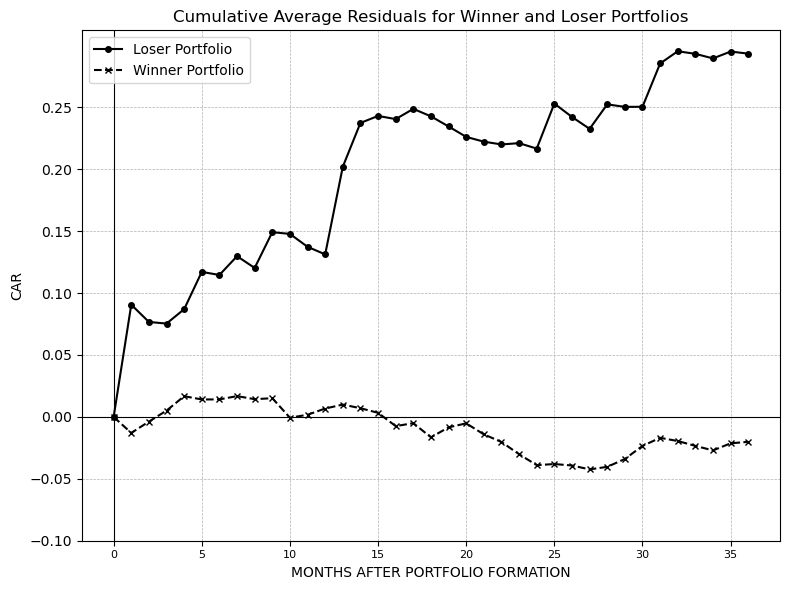

In [34]:
draw_CAR_pictures_modified(bottom_returns_3year_w,top_returns_3year_w,'vw')

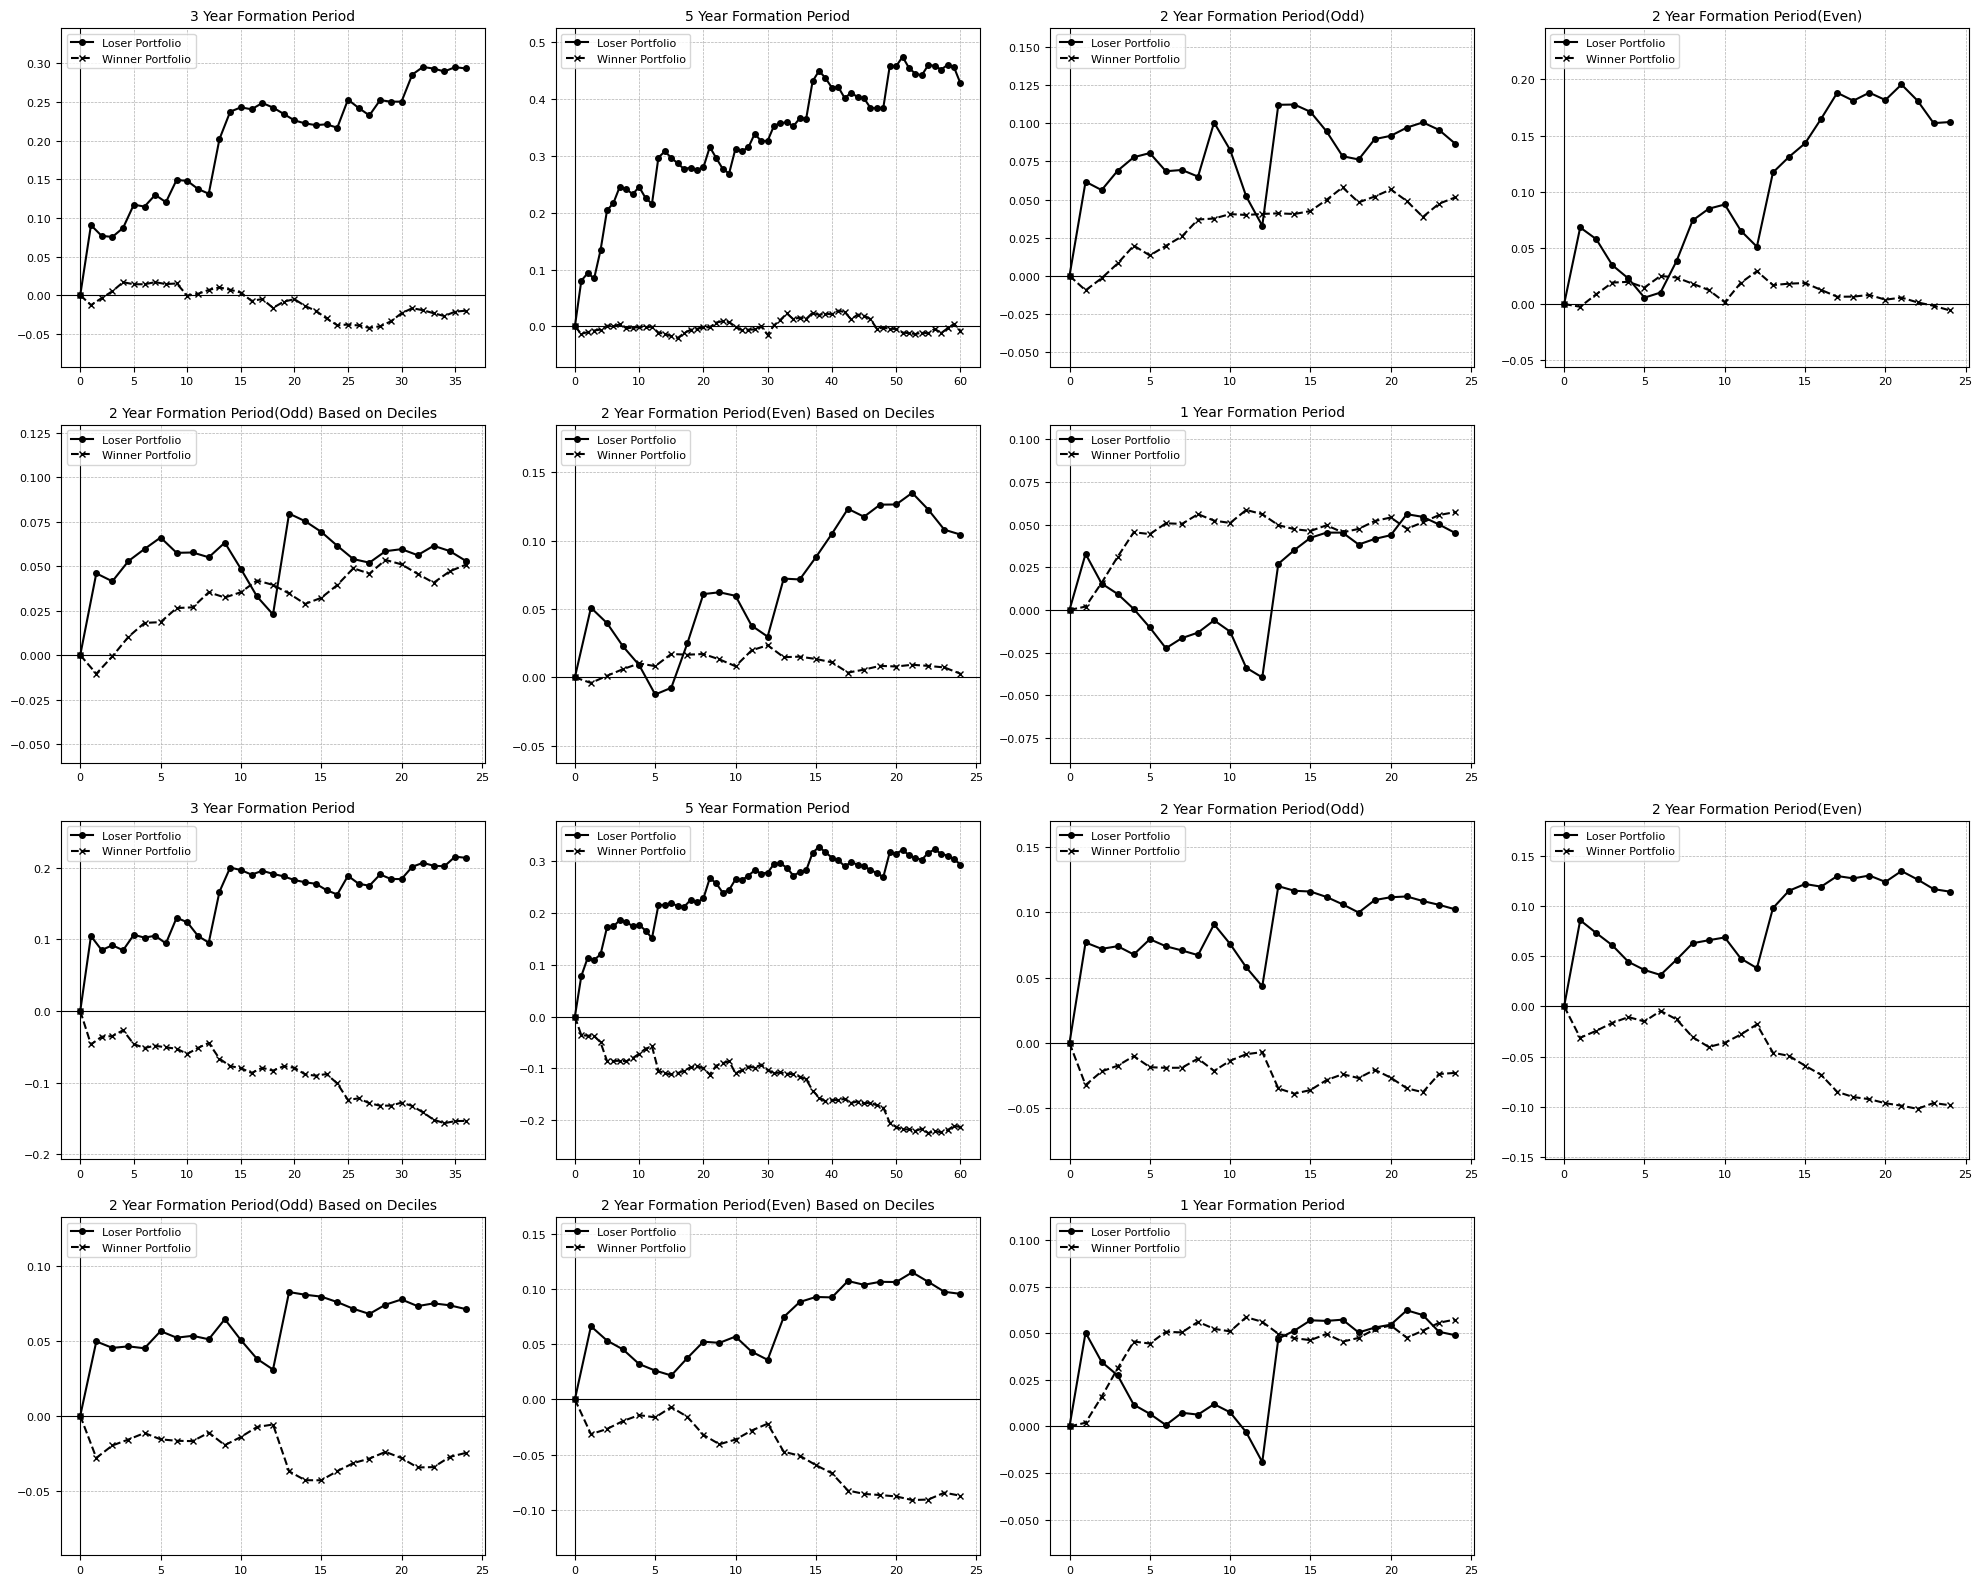

In [26]:
all_bottom = weighted_bottom + bottom
all_top = weighted_top + top
labels = [
    "3 Year Formation Period", "5 Year Formation Period", "2 Year Formation Period(Odd)", "2 Year Formation Period(Even)", "2 Year Formation Period(Odd) Based on Deciles", "2 Year Formation Period(Even) Based on Deciles", "1 Year Formation Period",
    "3 Year Formation Period", "5 Year Formation Period", "2 Year Formation Period(Odd)", "2 Year Formation Period(Even)", "2 Year Formation Period(Odd) Based on Deciles", "2 Year Formation Period(Even) Based on Deciles", "1 Year Formation Period"
]

row_cols = [4, 3, 4, 3]
n_rows = len(row_cols)

fig, axs = plt.subplots(n_rows, max(row_cols), figsize=(20, 16))
axs = axs.flatten()

current_index = 0
for row, cols in enumerate(row_cols):
    for col in range(cols):
        if current_index < len(all_bottom):
            ax = axs[row * max(row_cols) + col]  
            bottom_data = all_bottom[current_index]
            top_data = all_top[current_index]
            ax.plot(bottom_data['months'], bottom_data['CAR'], label='Loser Portfolio', color='black', linestyle='-', marker='o', markersize=4)
            ax.plot(top_data['months'], top_data['CAR'], label='Winner Portfolio', color='black', linestyle='--', marker='x', markersize=4)
            ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
            ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
            ax.set_title(labels[current_index], fontsize=10)
            ax.set_xlabel('Months After Portfolio Formation', fontsize=8) 
            ax.set_ylabel('CAR', fontsize=8)
            ax.tick_params(axis='x', labelsize=8)
            ax.tick_params(axis='y', labelsize=8)
            ax.legend(loc='upper left', fontsize=8)
            ax.grid(True, linestyle='--', linewidth=0.5)
            
            min_y = min(bottom_data['CAR'].min(), top_data['CAR'].min()) - 0.05  
            max_y = max(bottom_data['CAR'].max(), top_data['CAR'].max()) + 0.05 
            ax.set_ylim(min_y, max_y)
            
            current_index += 1
        else:
            fig.delaxes(axs[row * max(row_cols) + col])

plt.tight_layout()
delete_positions = [(2, 4), (4, 4)]
delete_indices = [(row - 1) * 4 + (col - 1) for row, col in delete_positions]
for idx in delete_indices:
    fig.delaxes(axs[idx])
plt.savefig('D:\\1YFT_Math_and_Finance\\Autumn\\Portfolio Management\\67-23_car.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [27]:
def calculate_s_and_t(period_start_dates, portfolios, price_data, benchmark_type, weight_type, holding_months, average_ar_car_bottom_1, average_ar_car_top_1):

    average_ar_car_bottom = average_ar_car_bottom_1.drop(index=0)
    average_ar_car_bottom = average_ar_car_bottom.reset_index(drop=True)
    average_ar_car_top = average_ar_car_top_1.drop(index=0)
    average_ar_car_top = average_ar_car_top.reset_index(drop=True)

    num_experiments = len(period_start_dates)

    pooled_variance_sum_bottom = pd.DataFrame(np.zeros_like(average_ar_car_bottom[['AR','CAR']]),columns=['AR','CAR'])
    pooled_variance_sum_top = pd.DataFrame(np.zeros_like(average_ar_car_top[['AR','CAR']]),columns=['AR','CAR'])

    
    
    for date in period_start_dates:
        bottom_single_AR_CAR = calculate_portfolio_returns_modified(
            date,
            portfolios[date][0],
            price_data,
            benchmark_type,
            weight_type,
            holding_months
        )
        
        top_single_AR_CAR = calculate_portfolio_returns_modified(
            date,
            portfolios[date][1],
            price_data,
            benchmark_type,
            weight_type,
            holding_months
        )
     
        minus_AR_CAR_bottom = (bottom_single_AR_CAR[['AR', 'CAR']] - average_ar_car_bottom[['AR', 'CAR']])**2
        minus_AR_CAR_bottom = minus_AR_CAR_bottom.fillna(0) 
        minus_AR_CAR_top = (top_single_AR_CAR[['AR', 'CAR']] - average_ar_car_top[['AR', 'CAR']])**2
        minus_AR_CAR_top = minus_AR_CAR_top.fillna(0) 
        pooled_variance_sum_bottom = pooled_variance_sum_bottom + minus_AR_CAR_bottom
        pooled_variance_sum_top = pooled_variance_sum_top + minus_AR_CAR_top
        #print(pooled_variance_sum_top)

    pooled_variance_car = (pooled_variance_sum_bottom + pooled_variance_sum_top)/ (2 * (num_experiments - 1)) 
    

    acar_diff = average_ar_car_bottom['CAR'] - average_ar_car_top['CAR']
    acar_diff_df = pd.DataFrame(acar_diff)
    acar_diff_df = acar_diff_df.rename(columns={'0':'ACAR Diff'})
    acar_diff_df.index = acar_diff_df.index + 1
    acar_diff_df.index.name = 'month'

    pooled_variance_ar_bottom = np.sqrt(pooled_variance_sum_bottom['AR']/(num_experiments - 1))
    pooled_variance_ar_top = np.sqrt(pooled_variance_sum_top['AR']/(num_experiments - 1))


    t_statistic_car = pd.DataFrame(acar_diff / np.sqrt(2 * pooled_variance_car['CAR'] / num_experiments))
    t_statistic_car = t_statistic_car.rename(columns={'CAR':'t-statistics'})
    t_statistic_car.index = t_statistic_car.index + 1 
    t_statistic_car.index.name = 'month'  

    t_statistic_bottom_ar = pd.DataFrame(average_ar_car_bottom['AR'] / (pooled_variance_ar_bottom / np.sqrt(num_experiments)))
    t_statistic_bottom_ar = t_statistic_bottom_ar.rename(columns={'AR':'loser-AR t-statistics'})
    t_statistic_bottom_ar.index = t_statistic_bottom_ar.index + 1  
    t_statistic_bottom_ar.index.name = 'month'  

    t_statistic_top_ar = pd.DataFrame(average_ar_car_top['AR'] / (pooled_variance_ar_top / np.sqrt(num_experiments)))
    t_statistic_top_ar = t_statistic_top_ar.rename(columns={'AR':'winner-AR t-statistics'})
    t_statistic_top_ar.index = t_statistic_top_ar.index + 1  
    t_statistic_top_ar.index.name = 'month'  
    #return acar_diff_df,t_statistic_car,t_statistic_bottom_ar,t_statistic_top_ar
    combined_df = pd.concat([acar_diff_df, t_statistic_car, t_statistic_bottom_ar, t_statistic_top_ar], axis=1)

    return combined_df

In [28]:
results_t_statistics = []

for i in range(len(bottom)):
    bottom_returns = bottom[i]
    top_returns = top[i]
    start_dates = period_start_dates[i]
    portfolio = portfolios[i]

    bottom_returns.drop(index=0, inplace=True)
    bottom_returns.reset_index(drop=True, inplace=True)
    top_returns.drop(index=0, inplace=True)
    top_returns.reset_index(drop=True, inplace=True)

    final_result = calculate_s_and_t(
        start_dates,
        portfolio,
        df_crsp, 
        "ewretd",
        "ew",
        holding_month[i],  
        bottom_returns,
        top_returns
    )

    results_t_statistics.append((final_result))

In [29]:
results_t_statistics_weighted = []

for i in range(len(bottom)):
    bottom_returns_w = weighted_bottom[i]
    top_returns_w = weighted_top[i]
    start_dates = period_start_dates[i]
    portfolio_w = portfolios_w[i]

    final_result = calculate_s_and_t(
        start_dates,
        portfolio_w,
        df_crsp,  
        "vwretd",
        "vw",
        holding_month[i], 
        bottom_returns_w,
        top_returns_w
    )

    results_t_statistics_weighted.append((final_result))

In [32]:
results_t_statistics_weighted[1].iloc[[0,11,12,17,23,24,35,59]]

,CAR,t-statistics,loser-AR t-statistics,winner-AR t-statistics
month,,,,
1,0.093154,2.629807,2.298603,-2.179008
12,0.215836,1.789484,-0.664899,0.128068
13,0.307261,2.375803,2.022152,-1.527758
18,0.284865,2.111967,0.130080,1.820151
24,0.260820,1.847872,-0.804682,-0.178161
25,0.312793,2.137322,1.716163,-0.834192
36,0.351622,1.842256,-0.047315,-0.297204
60,0.434637,2.185445,-1.815832,-2.319142
